In [2]:
import pandas as pd


In [3]:
file_path = "dentsu JDA - zadanie 2kolo.xlsx"
sheets_dict = pd.read_excel(file_path, sheet_name=None)

In [3]:
print(sheets_dict.keys())

dict_keys(['INTRO', 'zadanie 1 - media spendy', 'zadanie 2 - TV data', 'zadanie 3 - analyza CS', 'bonus zadanie - forecast SOM'])


## Zadanie 1

In [4]:
df_sheet1 = sheets_dict["zadanie 1 - media spendy"]
df_sheet1.head(3)

,Producer,Brand,Media Type,Media channel,Month,Year,Spend (€)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,7.401265e+06
2,COCA-COLA HBC CESKO A SLOVENSKO S.R.O.,CAPPY,Kiná,CONTINENTAL FILM,január,2023.0,2.694619e+04


In [5]:
all_money = df_sheet1.iloc[1]["Spend (€)"]
all_money

7401264.502434298

In [6]:
df_sheet1 = df_sheet1.drop([0, 1])


In [7]:
df_sheet1.head(3)

,Producer,Brand,Media Type,Media channel,Month,Year,Spend (€)
2,COCA-COLA HBC CESKO A SLOVENSKO S.R.O.,CAPPY,Kiná,CONTINENTAL FILM,január,2023.0,26946.190652
3,RAUCH SLOVENSKO S.R.O.,RAUCH HAPPY DAY,TV,TV DOMA,január,2023.0,349.360295
4,RAUCH SLOVENSKO S.R.O.,RAUCH HAPPY DAY,TV,TV DOMA,január,2023.0,225.093635


In [8]:
df_sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17603 entries, 2 to 17604
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Producer       17603 non-null  object 
 1   Brand          17603 non-null  object 
 2   Media Type     17603 non-null  object 
 3   Media channel  17603 non-null  object 
 4   Month          17603 non-null  object 
 5   Year           17603 non-null  float64
 6   Spend (€)      17603 non-null  float64
dtypes: float64(2), object(5)
memory usage: 962.8+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Podiel investícií podľa typu médií
- `Účel`: Ukázať, na ktoré typy médií (napr. televízia, filmová reklama) sa vynakladá najväčší podiel výdavkov.
- `Typ grafu`: Koláčový alebo stĺpcový graf. (Keďže viac ako 95 % médií tvorí televízia, koláčový graf rozmazal všetky nápisy, preto som sa rozhodol použiť stĺpcový graf )

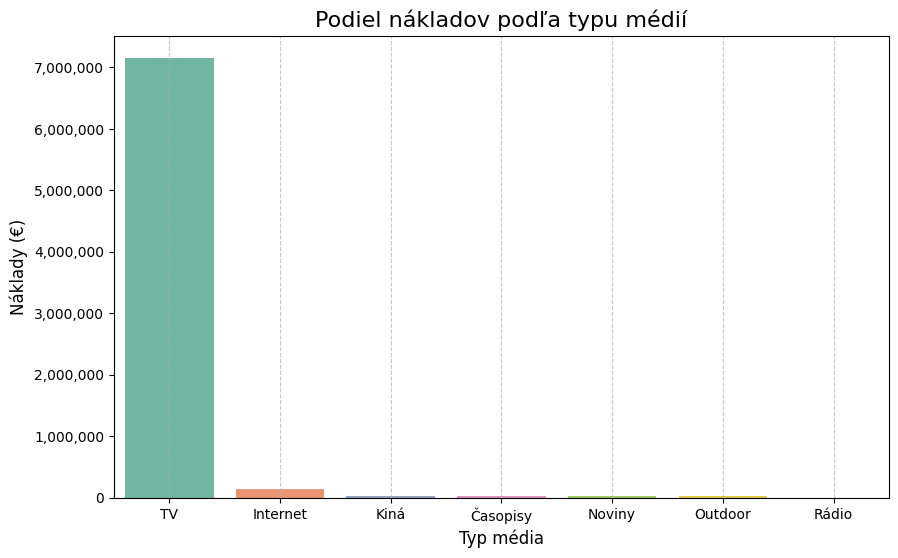

In [10]:
# Tento kód zoskupuje údaje podľa typu médií, sumarizuje výdavky na jednotlivé kategórie 
# a zoraďuje výsledky zostupne, aby ukázal, na ktoré médiá sa vynaložilo najviac peňaz
media_spend = df_sheet1\
    .groupby('Media Type')['Spend (€)']\
    .sum()\
    .sort_values(ascending=False)


# Tento kód nakreslí diagram
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=media_spend.values, x=media_spend.index, palette="Set2", hue=media_spend.index, dodge=False, legend=False)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


plt.title("Podiel nákladov podľa typu médií", fontsize=16)
plt.ylabel('Náklady (€)', fontsize=12)
plt.xlabel('Typ média', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.savefig('zadanie1/media_spend.png', dpi=300, bbox_inches='tight')


plt.show()


In [11]:
media_spend

Media Type
TV          7.158604e+06
Internet    1.385777e+05
Kiná        2.922750e+04
Časopisy    2.748522e+04
Noviny      2.303579e+04
Outdoor     2.082546e+04
Rádio       3.509176e+03
Name: Spend (€), dtype: float64

### 2. Rozdelenie výdavkov podľa mesiacov
- `Účel`: Ukázať sezónnosť výdavkov na reklamu s cieľom určiť, v ktorých mesiacoch sú investície vyššie.
- `Typ grafu`: Čiarkový graf.


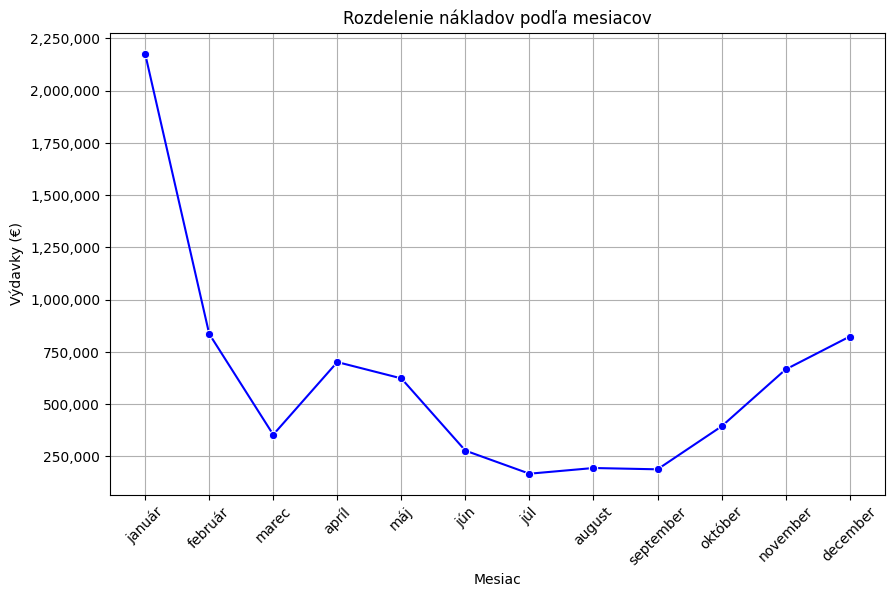

In [12]:
#Tento kód zoskupí údaje podľa mesiacov, zhrnie výdavky za každý mesiac 
# a potom zoradí výsledky podľa zadaného poradia mesiacov (január až december).

month_order = ['január', 'február', 'marec', 'apríl', 'máj', 'jún', 'júl', 'august', 'september', 'október', 'november', 'december']
monthly_spend = df_sheet1.\
    groupby('Month')['Spend (€)']\
        .sum()\
        .reindex(month_order)


# Tento kód nakreslí diagram
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=monthly_spend.index, y=monthly_spend.values, marker='o', color="b")
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


plt.title('Rozdelenie nákladov podľa mesiacov')
plt.xlabel('Mesiac')
plt.ylabel('Výdavky (€)')
plt.grid(True)

plt.savefig('zadanie1/month_order.png', dpi=300, bbox_inches='tight')


plt.show()


### 3. Najväčší výrobcovia podľa výdavkov
- `Účel`: Určiť, ktorí výrobcovia vynakladajú najviac prostriedkov na reklamu.
- `Typ grafu`: Horizontálny stĺpcový graf. (Je to preto, aby sa všetky názvy spoločností zmestili)

C:\Users\Sehii\AppData\Local\Temp\ipykernel_23504\1737487212.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=producer_spend.values, y=producer_spend.index, palette="Blues_d")


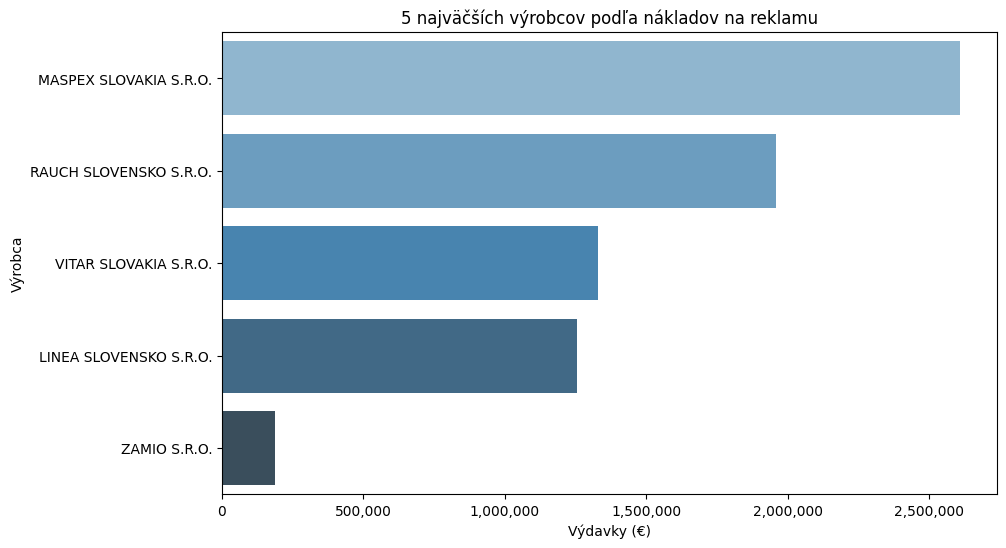

In [13]:
# Suma výdavkov podľa výrobcu
producer_spend = df_sheet1\
    .groupby('Producer')['Spend (€)']\
    .sum()\
    .nlargest(5)

# Tento kód nakreslí diagram
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=producer_spend.values, y=producer_spend.index, palette="Blues_d")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


plt.title('5 najväčších výrobcov podľa nákladov na reklamu')
plt.xlabel('Výdavky (€)')
plt.ylabel('Výrobca')

plt.savefig('zadanie1/producer_spend.png', dpi=300, bbox_inches='tight')

plt.show()


### 4. Najlepšie značky podľa výdavkov
- `Účel`: Ukázať top značky, na ktoré sa vynakladá najväčší rozpočet na reklamu.
- `Typ grafu`: stĺpcový graf

C:\Users\Sehii\AppData\Local\Temp\ipykernel_23504\3650759837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_spend.index, y=brand_spend.values, palette="Set3")


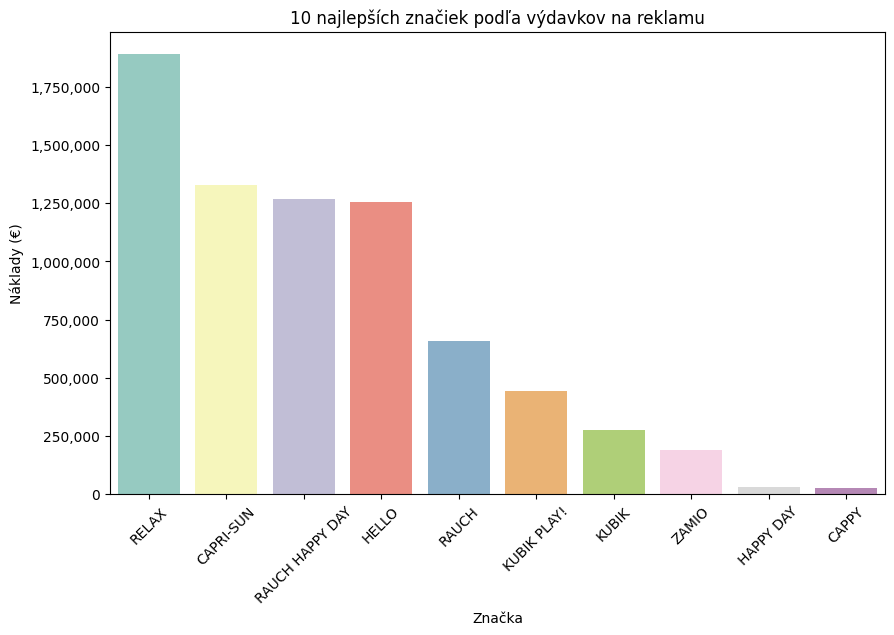

In [14]:
# Výška výdavkov podľa značky
brand_spend = df_sheet1.groupby('Brand')['Spend (€)'].sum().nlargest(10)

# Tento kód nakreslí diagram
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=brand_spend.index, y=brand_spend.values, palette="Set3")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


plt.title('10 najlepších značiek podľa výdavkov na reklamu')
plt.xlabel('Značka')
plt.ylabel('Náklady (€)')
plt.xticks(rotation=45)

plt.savefig('zadanie1/brand_spend.png', dpi=300, bbox_inches='tight')

plt.show()


### 5. Medziročné porovnanie
- `Účel`: Ukázať zmeny vo výdavkoch na reklamu medzi jednotlivými rokmi.
- `Typ grafu`: Zoskupený stĺpcový graf.

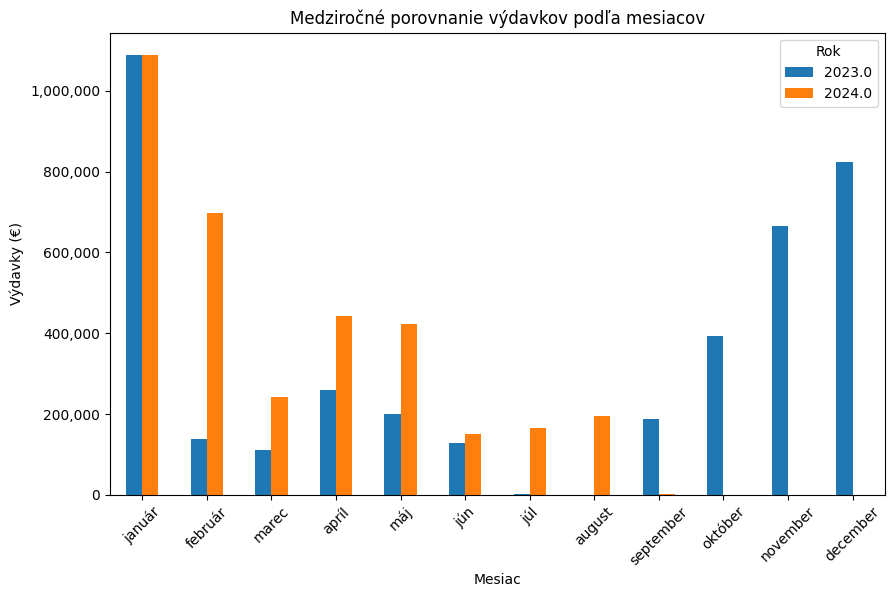

In [15]:
# Tento kód zoskupuje údaje podľa rokov a mesiacov, sumarizuje náklady pre každú kombináciu 
# rokov a mesiacov, potom reorganizuje údaje ako tabuľku (s rokmi ako riadkami 
# a mesiacmi ako stĺpcami) a mení poradie stĺpcov podľa zadaného poradia mesiacov.

yearly_monthly_spend = df_sheet1.groupby(['Year', 'Month'])['Spend (€)'].sum().unstack()

months_order = ['január', 'február', 'marec', 'apríl', 'máj', 'jún', 'júl', 'august', 'september', 'október', 'november', 'december']

yearly_monthly_spend = yearly_monthly_spend.reindex(columns=months_order)

ax = yearly_monthly_spend.T.plot(kind='bar', stacked=False, figsize=(10, 6))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Medziročné porovnanie výdavkov podľa mesiacov')
plt.xlabel('Mesiac')
plt.ylabel('Výdavky (€)')
plt.xticks(rotation=45)
plt.legend(title='Rok')

plt.savefig('zadanie1/yearly_monthly_spend.png', dpi=300, bbox_inches='tight')
plt.show()


### Analýza grafov

1. **Podiel výdavkov podľa typov médií**:
   - **Televízia (TV)** vedie vo výdavkoch medzi všetkými typmi médií, výrazne prekonáva ostatné kategórie.
   - **Internet** a **kinoreklama** obsadzujú nasledujúce pozície vo výdavkoch, ale ich podiely sú omnoho menšie v porovnaní s TV.
   - Najmenej nákladné kategórie — **Rádio** a **Outdoor** — zaberajú malú časť celkového reklamného rozpočtu.

   **Záver**: Televízia zostáva hlavným médiom pre reklamu v kategórii džúsov, na ktorú ide väčšina rozpočtu. To môže naznačovať jej efektívnosť pri oslovovaní širokého publika alebo tradičné preferencie spoločností.

2. **Rozdelenie výdavkov podľa mesiacov**:
   - Najvyššie výdavky na reklamu sa pozorujú v **januári**, čo môže súvisieť s novoročnými sviatkami, keď spoločnosti zvyšujú reklamné rozpočty.
   - Ostatné mesiace vykazujú rovnomernejšie rozdelenie s malými kolísaniami. 

   **Záver**: Existuje jasná sezónnosť v reklamných výdavkoch. Spoločnosti zvyšujú investície do reklamy v sviatočných mesiacoch, ako sú január a december.

3. **Top výrobcovia podľa výdavkov**:
   - Lídermi v reklamných výdavkoch sú **MASPEX SLOVAKIA S.R.O. a RAUCH SLOVENSKO S.R.O.**, čo naznačuje agresívnu stratégiu propagácie ich produktov, konkrétne značiek RELAX a RAUCH HAPPY DAY. 

   **Záver**: V kategórii džúsov dominujú dvaja hlavní hráči — Maspex a Rauch. Ich vysoké výdavky na reklamu naznačujú silnú konkurenciu v tejto kategórii produktov.

4. **Top značky podľa výdavkov**:
   - Značka **RELAX** vedie s veľkým odstupom, čo potvrdzuje vysoké výdavky spoločnosti Maspex. 
   - Značky **CAPRI SUN**, **RAUCH HAPPY DAY** a **HУLLO** tiež vykazujú značné investície do reklamy, pričom nasledujú lídra. 

   **Záver**: Značka RELAX sa vyznačuje ako najaktívnejšie propagovaná na trhu džúsov, zatiaľ čo nasledujúce 3 konkurenti sú na približne rovnakom úrovni s odstupom od lídra približne 700k eur.

5. **Medziročné porovnanie výdavkov**:
   - Je vidieť, že výdavky na reklamu sa v rôznych rokoch môžu líšiť, ale v mesiacoch s vyššou aktivitou (január a december) zostáva stabilne vysoká úroveň. 
   - V väčšine mesiacov sa výdavky len zvyšovali, čo môže naznačovať, že spoločnosti našli dobrú stratégiu a iba ju dodržiavajú, zvyšujúc investície. 

   **Záver**: Reklamné výdavky sú podrobené sezónnym zmenám, avšak spoločnosti môžu upravovať svoje reklamné rozpočty v závislosti od vonkajších faktorov, ako sú trhové podmienky alebo konkurencia.


## Zadanie 2

In [16]:
df_sheet2 = sheets_dict["zadanie 2 - TV data"]
df_sheet2.head(5)

,Názov zadávateľa,Produkt,Názov média,Dátum,Čas od,Pozícia v bloku,Počet reklám v bloku,Stopáž,TRP
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,12+
1,NaN,NaN,NaN,NaT,16:16:58.127000,8.015265,15.030529,20.341253,40822.000496
2,365.BANK A.S.,365.BANK,TV WAU,2024-09-23,04:11:23,1.000000,17.000000,30.000000,0.051365
3,ORANGE SLOVENSKO A.S.,ORANGE OPTICKY INTERNET,TV WAU,2024-09-23,04:11:53,2.000000,17.000000,15.000000,0.051365
4,365.BANK A.S.,365.BANK,TV JOJ,2024-09-23,04:11:54,1.000000,17.000000,30.000000,0.091479


In [17]:
df_sheet2 = df_sheet2.drop([0, 1])
df_sheet2.head(3)

,Názov zadávateľa,Produkt,Názov média,Dátum,Čas od,Pozícia v bloku,Počet reklám v bloku,Stopáž,TRP
2,365.BANK A.S.,365.BANK,TV WAU,2024-09-23,04:11:23,1.0,17.0,30.0,0.051365
3,ORANGE SLOVENSKO A.S.,ORANGE OPTICKY INTERNET,TV WAU,2024-09-23,04:11:53,2.0,17.0,15.0,0.051365
4,365.BANK A.S.,365.BANK,TV JOJ,2024-09-23,04:11:54,1.0,17.0,30.0,0.091479


### 1. %TRPs odvysielané na TV Wau v prime time (17:00 - 23:59)
- `Cieľ`: Určiť podiel TRP, ktoré boli odvysielané na TV Wau v hlavnom vysielacom čase.
- `Typ` grafu: koláčový graf.

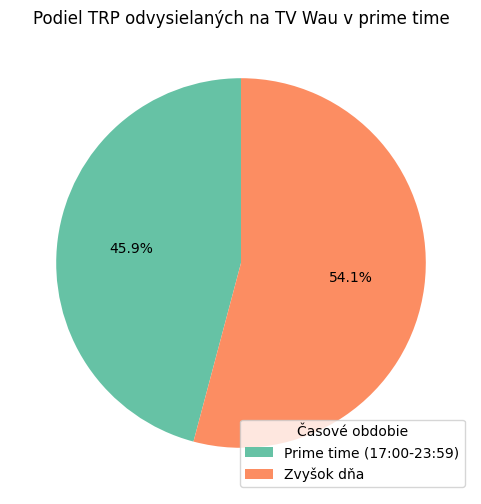

In [18]:
from datetime import time

# Prevod času vo formáte reťazca na formát času
df_sheet2['Čas od'] = pd.to_datetime(df_sheet2['Čas od'], format='%H:%M:%S').dt.time

# Filter pre TV Wau a prime time (17:00 - 23:59)
df_primetime = df_sheet2[(df_sheet2['Názov média'] == 'TV WAU') & 
                         (df_sheet2['Čas od'].between(time(17, 0, 0), time(23, 59, 59)))]

# Suma TRP v hlavnom vysielacom čase a vo všetkých ostatných časoch
total_trps = df_sheet2[df_sheet2['Názov média'] == 'TV WAU']['TRP'].sum()
primetime_trps = df_primetime['TRP'].sum()

prime_time_percentage = (primetime_trps / total_trps) * 100

sizes = [prime_time_percentage, 100 - prime_time_percentage]
colors = sns.color_palette("Set2")

plt.figure(figsize=(6, 6))
plt.pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors)

plt.legend(['Prime time (17:00-23:59)', 'Zvyšok dňa'], loc="best", title="Časové obdobie")
plt.title('Podiel TRP odvysielaných na TV Wau v prime time')

plt.savefig('zadanie2/Podiel TRP odvysielaných na TV Wau v prime time.png', dpi=300, bbox_inches='tight')


plt.show()


### 2. %TRPs pre zadávateľa NAY Elektrodom na prémiovej pozícii
- `Cieľ`: Zobrazenie percentuálneho podielu TRP inzerenta NAY Elektrodom na prémiových pozíciách (prvá, druhá, predposledná a posledná).
- `Typ grafu`: koláčový graf.



C:\Users\Sehii\AppData\Local\Temp\ipykernel_23504\606179807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nay['IsPremium'] = df_nay.apply(lambda row: row['Pozícia v bloku'] in [1, 2, row['Počet reklám v bloku'] - 1, row['Počet reklám v bloku']], axis=1)


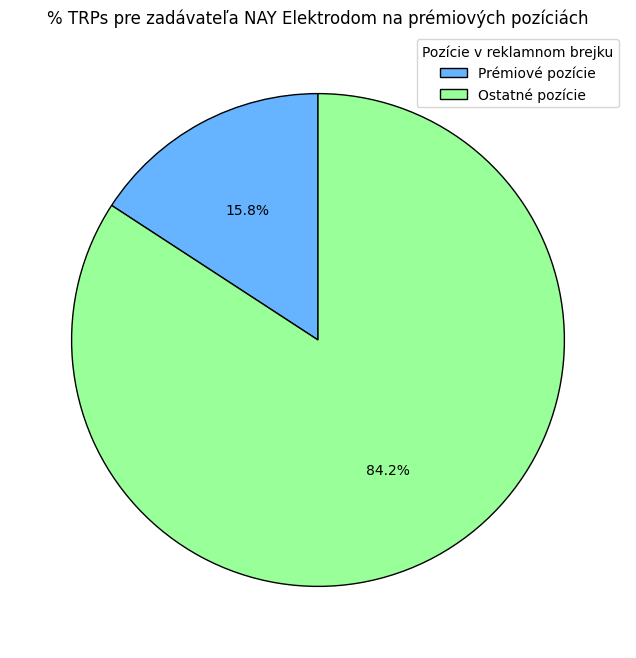

In [19]:


df_nay = df_sheet2[df_sheet2['Názov zadávateľa'] == 'NAY ELEKTRODOM']

# Určenie prémiových pozícií: prvá, druhá, predposledná a posledná
df_nay['IsPremium'] = df_nay.apply(lambda row: row['Pozícia v bloku'] in [1, 2, row['Počet reklám v bloku'] - 1, row['Počet reklám v bloku']], axis=1)

# suma TRP pre prémiové položky a neprémiové položky
premium_trps = df_nay[df_nay['IsPremium'] == True]['TRP'].sum()
non_premium_trps = df_nay[df_nay['IsPremium'] == False]['TRP'].sum()

labels = ['Prémiové pozície', 'Ostatné pozície']
sizes = [premium_trps, non_premium_trps]
colors = ['#66b3ff', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

plt.legend(labels, title="Pozície v reklamnom brejku", loc="upper right")

plt.title('% TRPs pre zadávateľa NAY Elektrodom na prémiových pozíciách')

plt.savefig('zadanie2/TRPs pre zadávateľa NAY Elektrodom na prémiových pozíciách.png', dpi=300, bbox_inches='tight')

plt.show()


### 3. Najčastejšie využívaná stopáž na TV Markíza počas 27.9.
- `Cieľ`: Určiť najčastejšie používanú dĺžku reklamy na základe počtu TRP v TV Markíza za 27. september.
- `Typ grafu`: Stĺpcový graf.

C:\Users\Sehii\AppData\Local\Temp\ipykernel_23504\3060670959.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stopaz_trps['Stopáž'], y=stopaz_trps['TRP'], palette='Blues_d')


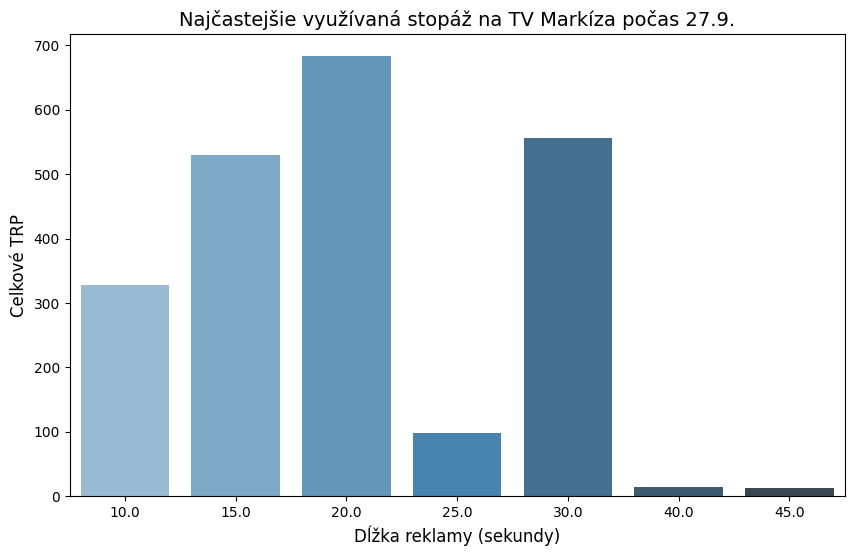

In [20]:
df_sheet2['Dátum'] = pd.to_datetime(df_sheet2['Dátum'])

#broken filter
# df_markiza = df_sheet2[(df_sheet2['Názov média'] == 'TV MARKÍZA') & 
#                        (df_sheet2['Dátum'] == '2024-09-27')]

# filter for TV Markíza / 27.11
df_markiza_27sept = df_sheet2[(df_sheet2['Názov média'].str.contains('MARKIZA', case=False, na=False)) & 
                              (df_sheet2['Dátum'] == '2024-09-27')]

stopaz_trps = df_markiza_27sept.groupby('Stopáž')['TRP'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=stopaz_trps['Stopáž'], y=stopaz_trps['TRP'], palette='Blues_d')

plt.title('Najčastejšie využívaná stopáž na TV Markíza počas 27.9.', fontsize=14)
plt.xlabel('Dĺžka reklamy (sekundy)', fontsize=12)
plt.ylabel('Celkové TRP', fontsize=12)

plt.savefig('zadanie2/Najčastejšie využívaná stopáž na TV Markíza počas 27.9.', dpi=300, bbox_inches='tight')

plt.show()


In [21]:
print(df_sheet2['Dátum'].unique())

print(df_sheet2['Názov média'].unique())


<DatetimeArray>
['2024-09-23 00:00:00', '2024-09-24 00:00:00', '2024-09-25 00:00:00',
 '2024-09-26 00:00:00', '2024-09-27 00:00:00', '2024-09-28 00:00:00',
 '2024-09-29 00:00:00']
Length: 7, dtype: datetime64[ns]
['TV WAU' 'TV JOJ' 'TV JOJ PLUS' 'TV MARKIZA' 'AMC' 'FILM+' 'SPEKTRUM'
 'TA3' 'TV JOJ24' 'TV DOMA' 'SPORT1' 'TV JOJ SPORT' 'TV JOJKO'
 'TV JOJ SVET' 'TV PRIMA SK' 'RTVS SPORT' 'JEDNOTKA' 'TV PRIMA COOL SK'
 'TV DAJTO' 'DVOJKA' 'TV MARKIZA KRIMI' 'TV MARKIZA KLASIK'
 'TV NOVA INTERNATIONAL']


In [22]:
#new filter
# Преобразование столбца 'Dátum' в datetime формат, если еще не выполнено
df_sheet2['Dátum'] = pd.to_datetime(df_sheet2['Dátum'])

# Filtrácia pre TV Markíza na 27. septembra
df_markiza_27sept = df_sheet2[(df_sheet2['Názov média'].str.contains('MARKIZA', case=False, na=False)) & 
                              (df_sheet2['Dátum'] == '2024-09-27')]
df_markiza_27sept.head(3)

,Názov zadávateľa,Produkt,Názov média,Dátum,Čas od,Pozícia v bloku,Počet reklám v bloku,Stopáž,TRP
33769,MAGIC EVENT PRODUCTION S.R.O.,LET'S DANCE TURNE,TV MARKIZA,2024-09-27,03:25:06,1.0,1.0,20.0,0.091123
34000,MAGIC EVENT PRODUCTION S.R.O.,LET'S DANCE TURNE,TV MARKIZA,2024-09-27,05:55:58,1.0,1.0,20.0,0.92912
34002,MAGIC EVENT PRODUCTION S.R.O.,LET'S DANCE TURNE,TV MARKIZA KLASIK,2024-09-27,05:56:22,1.0,1.0,20.0,0.128296


### Analýza grafov

1. Podiel TRP odvysielaných na TV Wau v prime time:

- **54.1%** TRP je generovaných mimo prime time (17:00-23:59), čo znamená, že viac ako polovica sledovanosti pochádza z iných častí dňa.
- **45.9%** TRP je generovaných počas prime time, čo predstavuje významnú časť sledovanosti, avšak nižšiu v porovnaní s non-prime časom.

***Záver***: TV Wau má vyvážený podiel TRP medzi prime time a non-prime time. Pre zadávateľov reklamy to znamená, že aj mimo hlavného vysielacieho času existuje významný potenciál na zásah divákov.

2. % TRPs pre zadávateľa NAY Elektrodom na prémiových pozíciách:
- Len **15.8%** TRP pochádza z prémiových pozícií v reklamných brejkoch (prvá, druhá, predposledná a posledná pozícia).
- **84.2%** TRP je získaných z ostatných, neprémiových pozícií, čo poukazuje na dominanciu týchto pozícií v celkovom sledovaní.

***Záver***: Prémiové pozície, hoci sa často považujú za atraktívne, prinášajú len malú časť celkového TRP pre NAY Elektrodom. Reklamné kampane by mali zvážiť, či sú tieto pozície skutočne efektívne z hľadiska nákladov.

3. Najčastejšie využívaná stopáž na TV Markíza počas 27.9:

- **Najviac** TRP bolo dosiahnutých reklamami s dĺžkou **20** a **30** sekúnd, ktoré generovali najvyššiu sledovanosť.
- Reklamy s dĺžkou **25** sekúnd mali výrazne nižší výkon v porovnaní s inými stopážami.

***Záver***: Na TV Markíza sa ako najefektívnejšie ukazujú reklamné formáty s dĺžkou **20** a **30** sekúnd, ktoré by mali byť uprednostňované pri plánovaní reklamných kampaní na maximalizáciu TRP.


### Celkový záver:
- Na TV Wau existuje významný potenciál na zásah aj mimo prime time, čo môže byť zaujímavé pre zadávateľov reklamy s obmedzeným rozpočtom.
- NAY Elektrodom by mal prehodnotiť efektivitu investovania do prémiových pozícií, keďže väčšina TRP pochádza z bežných pozícií v reklamných brejkoch.
- Na TV Markíza je zrejmé, že 20- a 30-sekundové reklamy dosahujú najvyššiu sledovanosť, čo naznačuje optimálne trvanie reklám pre túto stanicu.


## Zadanie 3

In [11]:
df_sheet3 = sheets_dict["zadanie 3 - analyza CS"]
df_sheet3.head(5)

,OA 4. 10. 2024 12:30:25,OA 4. 10. 2024 12:30:25.1,OA 4. 10. 2024 12:30:25.2,Unnamed: 3,Unnamed: 4
0,CCS SK 2023,CCS SK 2023,CCS SK 2023,NaN,NaN
1,NaN,NaN,NaN,W23-38 vychod,W23-38 vychod
2,CS: CS Všetci,CS: CS Všetci,CS: CS Všetci,s.%,Index
3,"Projection to population, Vážené","Projection to population, Vážené","Projection to population, Vážené",NaN,NaN
4,NaN,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,NaN,NaN


In [ ]:
df_sheet3 = df_sheet3.drop([0, 1, 2, 3])


In [13]:
df_sheet3.head(20)

,OA 4. 10. 2024 12:30:25,OA 4. 10. 2024 12:30:25.1,OA 4. 10. 2024 12:30:25.2,Unnamed: 3,Unnamed: 4
4,NaN,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,NaN,NaN
5,NaN,NaN,(1) Vôbec nie ako ja,0.879443,21.112753
6,NaN,NaN,(2) Skôr nie ako ja,10.241575,123.109377
7,NaN,NaN,(3) Trochu ako ja,29.551422,104.899077
8,NaN,NaN,(4) Celkom ako ja,17.75241,61.23556
9,NaN,NaN,(5) Veľmi ako ja,21.242014,126.662051
10,NaN,NaN,(6) Úplne presne ako ja,20.333136,149.693457
11,NaN,(V1_2) Pre túto osobu je dôležité byť bohatý; ...,(V1_2) Pre túto osobu je dôležité byť bohatý; ...,NaN,NaN
12,NaN,NaN,(1) Vôbec nie ako ja,15.080544,80.0185
13,NaN,NaN,(2) Skôr nie ako ja,22.859564,93.357164


In [23]:
# Dataframe na ukladanie výsledkov
data = {'Otázka': [], 'Odpoveď': [], 's.%': [], 'index': []}

current_question = None

# Prechádzame cez riadky dataframe a vytvárame nový formát
for idx, row in df_sheet3.iterrows():
    # Ak nájdeme otázku (dlhý text v jednej z kolón), ukladáme ju
    if pd.notna(row[1]):
        current_question = row[1]
    # Ak nájdeme možnosti odpovedí, percentá a indexy, pridávame ich do výsledku
    elif pd.notna(row[2]) and pd.notna(row[3]) and pd.notna(row[4]):
        data['Otázka'].append(current_question)
        data['Odpoveď'].append(row[2])
        data['s.%'].append(row[3])
        data['index'].append(row[4])

# Pretransformujeme výsledky do nového DataFrame
df = pd.DataFrame(data)


C:\Users\Sehii\AppData\Local\Temp\ipykernel_23556\2813968189.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.notna(row[1]):
C:\Users\Sehii\AppData\Local\Temp\ipykernel_23556\2813968189.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_question = row[1]
C:\Users\Sehii\AppData\Local\Temp\ipykernel_23556\2813968189.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif pd.notna(row[2]) and pd.notna(row[3]) and 

In [24]:
df.head(20)

,Otázka,Odpoveď,s.%,index
0,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,(1) Vôbec nie ako ja,0.879443,21.112753
1,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,(2) Skôr nie ako ja,10.241575,123.109377
2,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,(3) Trochu ako ja,29.551422,104.899077
3,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,(4) Celkom ako ja,17.752410,61.235560
4,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,(5) Veľmi ako ja,21.242014,126.662051
5,(V1_1) Pre túto osobu je dôležité vymýšľať nov...,(6) Úplne presne ako ja,20.333136,149.693457
6,(V1_2) Pre túto osobu je dôležité byť bohatý; ...,(1) Vôbec nie ako ja,15.080544,80.018500
7,(V1_2) Pre túto osobu je dôležité byť bohatý; ...,(2) Skôr nie ako ja,22.859564,93.357164
8,(V1_2) Pre túto osobu je dôležité byť bohatý; ...,(3) Trochu ako ja,35.964814,127.084677
9,(V1_2) Pre túto osobu je dôležité byť bohatý; ...,(4) Celkom ako ja,11.743722,79.828818


In [25]:
df.tail(20)

,Otázka,Odpoveď,s.%,index
730,"(M5B.M5B) Čo najčastejšie robíte, keď sa chcet...",(007) Návšteva kina,0.659379,30.841644
731,"(M5B.M5B) Čo najčastejšie robíte, keď sa chcet...",(008) Využívanie internetu na počítači,12.575345,68.551872
732,"(M5B.M5B) Čo najčastejšie robíte, keď sa chcet...",(009) Využívanie internetu na mobilnom telefóne,28.198560,141.711476
733,"(M5B.M5B) Čo najčastejšie robíte, keď sa chcet...",(010) Využívanie internetu na tablete,7.606566,191.938078
734,"(M5B.M5B) Čo najčastejšie robíte, keď sa chcet...",(011) Používanie digitálneho osobného asistent...,7.394632,72.644594
735,"(M5B.M5B) Čo najčastejšie robíte, keď sa chcet...","(012) Hranie hier (online, počítač, konzola)",4.062256,98.759067
736,"(M5B.M5B) Čo najčastejšie robíte, keď sa chcet...",(013) Nikdy / skoro nikdy túto činnosť nevykon...,11.984554,169.013341
737,"(M5F.M5F) Čo najčastejšie robíte, keď sa chcet...",(001) Využívanie internetu,12.780362,82.002170
738,"(M5F.M5F) Čo najčastejšie robíte, keď sa chcet...",(002) Využívanie sociálnych sietí,19.809493,128.444967
739,"(M5F.M5F) Čo najčastejšie robíte, keď sa chcet...",(003) Sledovanie televízie,12.894340,75.965062


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Otázka   750 non-null    object 
 1   Odpoveď  750 non-null    object 
 2   s.%      750 non-null    float64
 3   index    750 non-null    float64
dtypes: float64(2), object(2)
memory usage: 23.6+ KB


In [73]:
# Nájdeme top-5 hodnôt indexu v celom dataframe
top_5_indexes = df['index'].nlargest(11)

# Filtrovame dataframe, aby sme nechali iba riadky, kde index patrí do top-5
df_top5 = df[df['index'].isin(top_5_indexes)]

# Nájdeme jedinečné otázky, v ktorých sú prítomné top-5 indexy
top_questions = df_top5['Otázka'].unique()

# Filtrovame pôvodný dataframe podľa nájdených otázok
df_result = df[df['Otázka'].isin(top_questions)]


In [74]:
df_result

,Otázka,Odpoveď,s.%,index
54,(A1_16) Názory ostatných ľudí na produkty ma o...,(1) Rozhodne nesúhlasím,3.277192,28.483199
55,(A1_16) Názory ostatných ľudí na produkty ma o...,(2) Skôr nesúhlasím,9.249154,47.733702
56,(A1_16) Názory ostatných ľudí na produkty ma o...,"(3) Ani súhlasím, ani nesúhlasím",38.928325,105.028275
57,(A1_16) Názory ostatných ľudí na produkty ma o...,(4) Skôr súhlasím,37.435085,137.422471
58,(A1_16) Názory ostatných ľudí na produkty ma o...,(5) Rozhodne súhlasím,11.110244,230.874809
...,...,...,...,...
706,(Z5_R2.Z5_R2) TÝŽDENNÝ REACH,(050) Obdržanie reklamy na mobilný telefón,39.382797,114.207068
707,(Z5_R2.Z5_R2) TÝŽDENNÝ REACH,(051) Cestovanie autom / taxíkom / autobusom /...,43.107637,92.167720
708,(Z5_R2.Z5_R2) TÝŽDENNÝ REACH,(052) Cestovanie vlakom,21.003128,117.781995
709,(Z5_R2.Z5_R2) TÝŽDENNÝ REACH,(053) Cestovanie prenajatým autom so službami ...,16.748393,203.070884


In [75]:
df_typical_answers = df_result.loc[df_result.groupby('Otázka')['index'].idxmax(), ['Otázka', 'Odpoveď']]

In [77]:
df_typical_answers

,Otázka,Odpoveď
58,(A1_16) Názory ostatných ľudí na produkty ma o...,(5) Rozhodne súhlasím
64,(A1_19) Obavy o bezpečnosť na internete ma odr...,(5) Rozhodne súhlasím
82,(A1_3) S väčšou pravdepodobnosťou by som si kú...,(5) Rozhodne súhlasím
122,(A2_11) Nikdy nevychádzam z domu bez make-upu,"(3) Ani súhlasím, ani nesúhlasím"
196,(A2_27) Pri výbere produktov a služieb často d...,(5) Rozhodne súhlasím
231,(A2_8) Miniem veľa peňazí na osobné kozmetické...,(4) Skôr súhlasím
394,"(A4_14) Moje deti majú vplyv na to, čo kupujem",(5) Rozhodne súhlasím
472,(A4_6) Kupujem si najnovšie módne značky a štýly,(5) Rozhodne súhlasím
617,(M1A_R1A.M1A_R1A) Ako často vykonávate nasledo...,(001) Používanie internetu (na akomkoľvek zari...
709,(Z5_R2.Z5_R2) TÝŽDENNÝ REACH,(053) Cestovanie prenajatým autom so službami ...


In [79]:
df_typical_answers.to_excel("zadanie3/df_typical_answers.xlsx", index=False, engine='openpyxl')

# Analýza typických odpovedí cieľovej skupiny

Na základe poskytnutých typických odpovedí cieľovej skupiny môžeme získať niekoľko analytických záverov, ktoré môžu pomôcť pri tvorbe reklamných stratégií a pochopení správania spotrebiteľov. Tu sú kľúčové postrehy, ktoré môžeme vyvodiť z tabuľky:

## 1. Vplyv názorov iných ľudí
- **Spoločné témy**: Mnohé odpovede naznačujú, že cieľová skupina je silno ovplyvnená názorom a odporúčaniami iných.
  
**Odporúčanie**: Použite sociálne dôkazy, recenzie a odporúčania influencerov v reklamných kampaniach, aby ste zvýšili dôveru k produktom.

## 2. Bezpečnosť online nákupov
- **Obavy**: Odpoveď na otázku o bezpečnosti pri online nákupoch tiež zdôrazňuje, že cieľová skupina má obavy spojené s internetovými nákupmi.

**Odporúčanie**: Zdôraznite v reklamách opatrenia bezpečnosti, ktoré prijímate na ochranu údajov zákazníkov a predchádzanie podvodom.

## 3. Vplyv detí na nákupy
- **Rodičský faktor**: Uvedenie, že deti ovplyvňujú nákupy, naznačuje význam cieľovej skupiny ako rodičov.

**Odporúčanie**: Vypracujte reklamné kampane, ktoré budú zamerané na rodičov, zdôrazňujúce výhody vašich produktov pre deti alebo rodinné hodnoty.

## 4. Starostlivosť o seba a osobná kozmetika
- **Kozmetické výdavky**: Odpovede naznačujú, že respondenti míňajú veľa peňazí na osobné kozmetické produkty, čo naznačuje vysokú citlivosť cieľovej skupiny na produkty osobnej hygieny a kozmetiky.

**Odporúčanie**: Reklamujte svoje kozmetické produkty so zameraním na ich kvalitu a výhody pre spotrebiteľa.

## 5. Prepojenie s módnymi značkami
- **Móda a štýl**: Vysoký záujem o najnovšie módne trendy naznačuje túžbu cieľovej skupiny vyjadriť sa prostredníctvom módy.

**Odporúčanie**: Využite módnych lídrov názorov a kampane zamerané na štýl, aby ste pritiahli pozornosť tejto cieľovej skupiny.

## 6. Online aktivity
- **Používanie internetu**: Frekvencia používania internetu naznačuje dôležitosť digitálnych kanálov pre interakciu so zákazníkmi.

**Odporúčanie**: Uistite sa, že vaša reklama je aktívne prezentovaná v online priestore, vrátane sociálnych sietí a platforiem, ktoré sú najpopulárnejšie medzi vašou cieľovou skupinou.

## 7. Tendency k cestovaniu
- **Mobilita a cestovanie**: Uvedenie o cestovaní prenajatými autami naznačuje rastúci záujem o pohodlie a dostupnosť služieb.

**Odporúčanie**: Spolupracujte so službami taxi a prenájmu áut na propagácii svojho produktu alebo služby, najmä v kontexte cestovania.

## Zhrnutie odporúčaní:
1. **Cielenie na rodičov**: Zohľadnite vplyv detí na nákupy a zamerajte svoje reklamné úsilie na rodičovskú skupinu.
2. **Bezpečnosť a dôvera**: Venovať pozornosť obavám zákazníkov a ponúknuť záruky a služby na ochranu údajov.
3. **Sociálne siete**: Vypracujte stratégiu založenú na sociálnych sieťach, pričom využite názory a recenzie na propagáciu svojich produktov.
4. **Móda a štýl**: Zvážte spoluprácu s blogermi a módnymi influencerami na propagáciu nových kolekcií a trendov.

